# Implementing ANOVA for Categorical variable

In [75]:
# to import the data
import pandas as pd

# to visualize the data
import seaborn as sns

# to do ANOVA
import statsmodels.api as sm

# to find best fit line in regression
from statsmodels.formula.api import ols

# ANOVA Post Hoc test: TukeyHSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [67]:
df = pd.read_csv("train.csv")
df.dropna()
df.reset_index()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.32
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5.26
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5.35
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5.15
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.40


<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

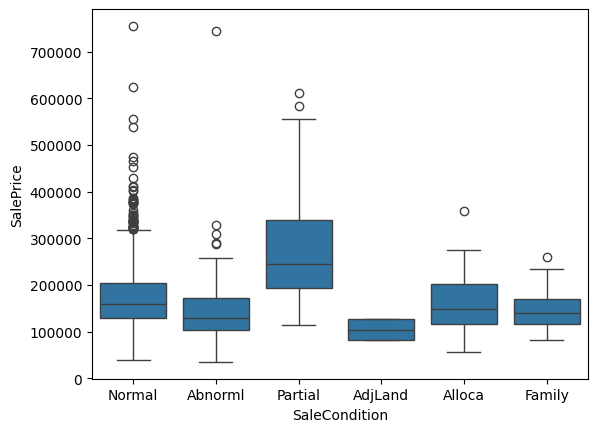

In [68]:
sns.boxplot(x = "SaleCondition", y = "SalePrice", data = df)

in above boxplot chart, we can't do ANOVA because the Normality distribution for variables are rejected

to fix this problem, there's a method called: "transform". By doing Log10 for dependent varialbe (that is done in csv file) there's a chance to transform data distribution into normal

<Axes: xlabel='SaleCondition', ylabel='LogSalePrice'>

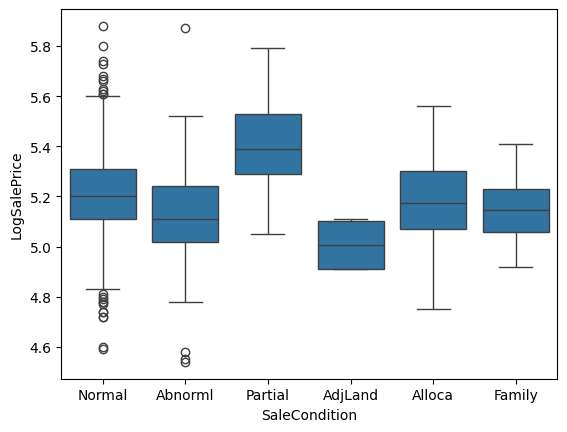

In [69]:
sns.boxplot(x = "SaleCondition", y = "LogSalePrice", data = df)

as it can be seen, the data distribution is now normal

now we can do ANOVA to conclude the mean difference

In [70]:
# creating the model
model = ols(formula = "LogSalePrice ~ C(SaleCondition)", data = df).fit()

In [71]:
# see the result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     43.21
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.26e-41
Time:                        18:29:52   Log-Likelihood:                 586.90
No. Observations:                1460   AIC:                            -1162.
Df Residuals:                    1454   BIC:                            -1130.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.1198      0.016    317.203      0.000       5.088       5.151
C(SaleCondition)[T.AdjLand]    -0.1123      0.083     -1.358      0.175      -0.275       0.050
C(SaleCondition)[T.Alloca]      0.0560      0.050      1.131      0.258      -0.041       0.153
C(SaleCondition)[T.Family]      0.0337      0.040      0.849      0.396      -0.044       0.112
C(SaleCondition)[T.Normal]      0.0940      0.017      5.594      0.000       0.061       0.127
C(SaleCondition)[T.Partial]     0.2865      0.022     13.202      0.000       0.244       0.329
==============================================================================
Omnibus:                       29.056   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.856
Skew:                           0.111   Prob(JB):                     3.33e-12
Kurtosis:                       3.905   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the result of OLS Regression is acceptable because all of assumptions have been met; but R-squared = 0.129 shows a weak coefficient to rely on for forcasting

this means that there are other variables that effect the SalePrice

## One-Way ANOVA

In [72]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(SaleCondition),5.685171,5.0,43.213561,1.259524e-41
Residual,38.257615,1454.0,NaN,NaN


The P-value almost equal to 0 which less than 0.05 and shows each Salecondition elements have statistically significant difference between their mean difference  

to see where is the difference happens, we will do TukeyHSD Post-Hoc test

In [73]:
tukey_oneway = pairwise_tukeyhsd(endog = df["LogSalePrice"], groups = df["SaleCondition"], alpha = 0.05)

In [74]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Abnorml,AdjLand,-0.1123,0.7521,-0.3483,0.1237,False
Abnorml,Alloca,0.056,0.8684,-0.0853,0.1974,False
Abnorml,Family,0.0337,0.9582,-0.0796,0.147,False
Abnorml,Normal,0.094,0.0,0.0461,0.142,True
Abnorml,Partial,0.2865,0.0,0.2246,0.3484,True
AdjLand,Alloca,0.1683,0.4677,-0.0989,0.4356,False
AdjLand,Family,0.146,0.5698,-0.1075,0.3995,False
AdjLand,Normal,0.2063,0.1134,-0.0255,0.4381,False
AdjLand,Partial,0.3988,0.0,0.1637,0.6339,True
Alloca,Family,-0.0223,0.999,-0.1913,0.1467,False


for each p-adj which is lower than 0.05, we will reject the Null Hypothesis. this means that there is statistically significant difference between group1 and group2

## Two-Way ANOVA

In One-Way ANOVA we can do our anlaysis with only one independent variable

but in Two-Way ANOVA, we can import more than one variable

In [76]:
second_model = ols(formula = "LogSalePrice ~ C(SaleCondition) + C(HeatingQC) + C(SaleCondition):C(HeatingQC)", data = df).fit()

In [78]:
sm.stats.anova_lm(second_model, typ=3)

C:\Users\Mahyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 11
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
Intercept,1053.520256,1.0,48824.636434,0.000000e+00
C(SaleCondition),2.071558,5.0,19.200977,1.544307e-18
C(HeatingQC),0.636269,4.0,7.371857,7.085882e-06
C(SaleCondition):C(HeatingQC),0.373008,20.0,0.864339,5.752860e-01
Residual,31.093374,1441.0,NaN,NaN


as the result shows in the 3rd row which is the interaction of SaleCondition and HeatingQC (which in reality these variables have nothing to do with each other) is calculated.

the P-value is 0.575 which is greater than 0.05 which accept the Null Hypothesis that there is not statistically significant between the mean difference of LogSalePrice for each SaleCondition and HeatingQC